In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import CategoricalNB
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.ensemble import RandomForestClassifier

sns.set()

In [2]:
df = pd.read_csv('hotels_with_dummy_regions.csv', index_col='id')
df.describe()

,latitude,longitude,rating,num_reviews,photo_count,price_level_num,ranking_relation,amenities_count,brand_binary,region_Catalonia,region_Emirate of Dubai,region_Red Sea and Sinai,region_South Aegean,region_Turkish Aegean Coast,region_Turkish Mediterranean Coast
count,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000
mean,31.607489,35.995338,0.657511,1929.244635,1560.814592,2.141631,0.248052,68.481545,0.418026,0.180258,0.437768,0.128755,0.051502,0.179399,0.022318
std,6.851927,19.677281,0.474746,2405.844558,2328.728259,0.943248,0.192002,40.339079,0.493446,0.384567,0.496325,0.335073,0.221115,0.383851,0.147778
min,24.816820,2.070631,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.220015,27.138655,0.000000,219.000000,168.000000,1.000000,0.090000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.907465,34.327927,1.000000,1073.000000,596.000000,2.000000,0.210000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.424140,55.266380,1.000000,2607.000000,1857.000000,3.000000,0.370000,96.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,41.435448,55.662610,1.000000,15221.000000,13798.000000,4.000000,1.000000,210.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
X = df.drop(['rating'], axis='columns')
X_scaled = minmax_scale(X)
Y = df.rating
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)
X_train_split, X_validation, y_train_split, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
X_train.shape, X_train_split.shape, X_validation.shape, X_test.shape

((932, 14), (745, 14), (187, 14), (233, 14))

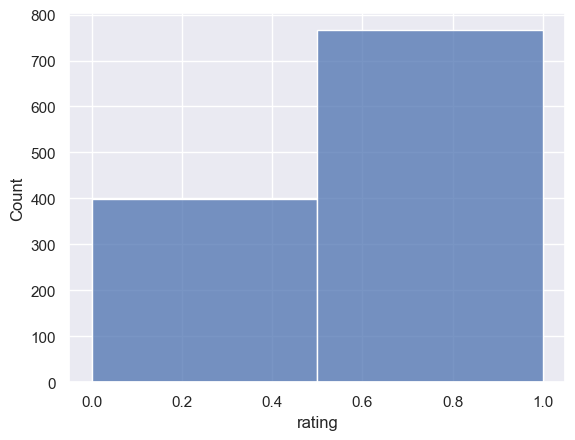

In [14]:
sns.histplot(Y, binwidth=0.5);

## KNN

In [15]:
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 20)}
knn_gscv = GridSearchCV(knn, param_grid, cv=10)
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_, knn_gscv.best_score_

({'n_neighbors': 9}, 0.8229466941203386)

In [16]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_split, y_train_split)
y_pred = knn.predict(X_validation)
confusion_matrix(y_validation, y_pred)

array([[56, 18],
       [17, 96]], dtype=int64)

In [17]:
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        74
           1       0.84      0.85      0.85       113

    accuracy                           0.81       187
   macro avg       0.80      0.80      0.80       187
weighted avg       0.81      0.81      0.81       187



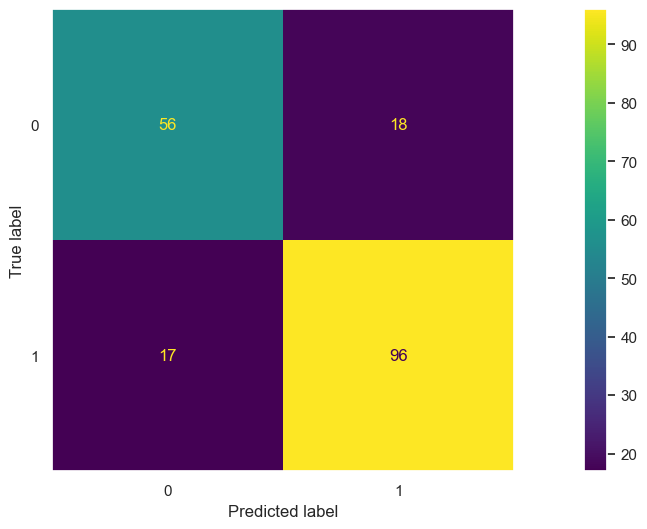

In [20]:
c_matrix = confusion_matrix(y_validation, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels=sorted(list(set(y_test))))
fig, ax = plt.subplots(figsize=(18, 6))
ax.grid(False)
cm_display.plot(ax=ax)
plt.show()

## Random Forest Classifier

In [21]:
rfc=RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1, 2, 4, 5],
    'criterion': ['entropy', 'gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]})

In [22]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [23]:
CV_rfc.best_score_

0.8540394456902997

In [20]:
rfc=RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt', n_estimators=600)
rfc.fit(X_train_split, y_train_split)
y_pred = rfc.predict(X_validation)
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        74
           1       0.80      0.90      0.85       113

    accuracy                           0.80       187
   macro avg       0.81      0.78      0.78       187
weighted avg       0.80      0.80      0.80       187



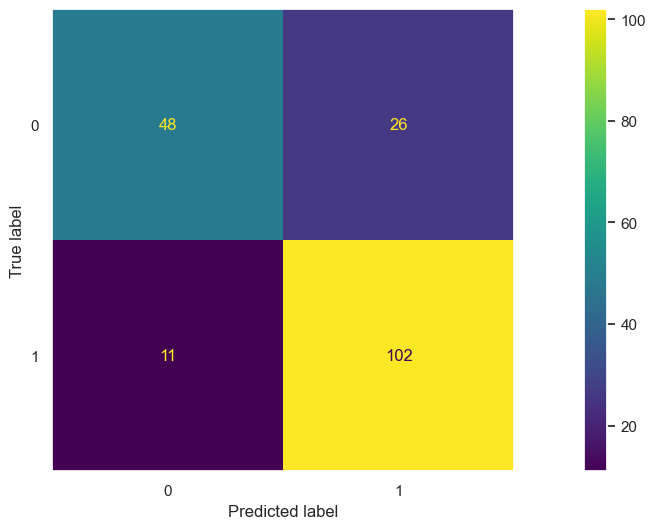

In [24]:
c_matrix = confusion_matrix(y_validation, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels=sorted(list(set(y_test))))
fig, ax = plt.subplots(figsize=(18, 6))
ax.grid(False)
cm_display.plot(ax=ax)
plt.show()

## Logistic regression

In [31]:
clf=LogisticRegression()
cross_val_score(clf, X_train, y_train, cv=10).mean()

0.8240105239075726

In [29]:
clf=LogisticRegression()
clf.fit(X_train_split, y_train_split)
y_pred = clf.predict(X_validation)
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.59      0.69        74
           1       0.77      0.91      0.84       113

    accuracy                           0.79       187
   macro avg       0.79      0.75      0.76       187
weighted avg       0.79      0.79      0.78       187



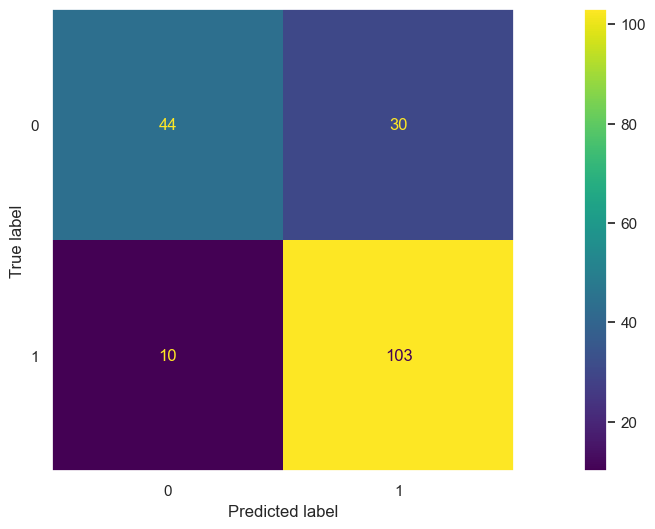

In [30]:
c_matrix = confusion_matrix(y_validation, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels=sorted(list(set(y_test))))
fig, ax = plt.subplots(figsize=(18, 6))
ax.grid(False)
cm_display.plot(ax=ax)
plt.show()

## Naïve Bayes

In [33]:
clf = CategoricalNB(min_categories=X.nunique())
cross_scores = cross_val_score(clf, X_train, y_train, cv=10)
cross_scores.mean()

0.6512926103866393

In [34]:
clf=CategoricalNB()
clf.fit(X_train_split, y_train_split)
y_pred = clf.predict(X_validation)
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.39      0.48        74
           1       0.68      0.83      0.75       113

    accuracy                           0.66       187
   macro avg       0.64      0.61      0.61       187
weighted avg       0.65      0.66      0.64       187



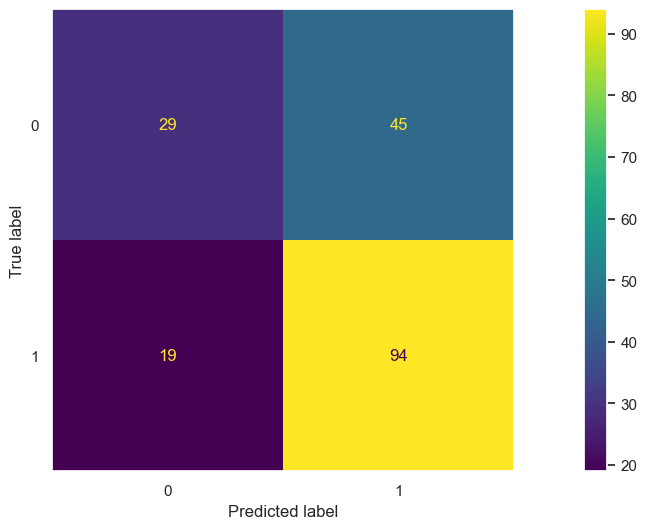

In [35]:
c_matrix = confusion_matrix(y_validation, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels=sorted(list(set(y_test))))
fig, ax = plt.subplots(figsize=(18, 6))
ax.grid(False)
cm_display.plot(ax=ax)
plt.show()

## LDA

In [36]:
lda = LDA(store_covariance=True)
cross_scores = cross_val_score(lda, X_train, y_train, cv=10)
cross_scores.mean()

0.8293639899336537

In [38]:
lda.fit(X_train_split, y_train_split)
lda_pred = lda.predict(X_validation)
print(classification_report(y_validation, lda_pred))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68        74
           1       0.77      0.89      0.83       113

    accuracy                           0.78       187
   macro avg       0.78      0.74      0.75       187
weighted avg       0.78      0.78      0.77       187



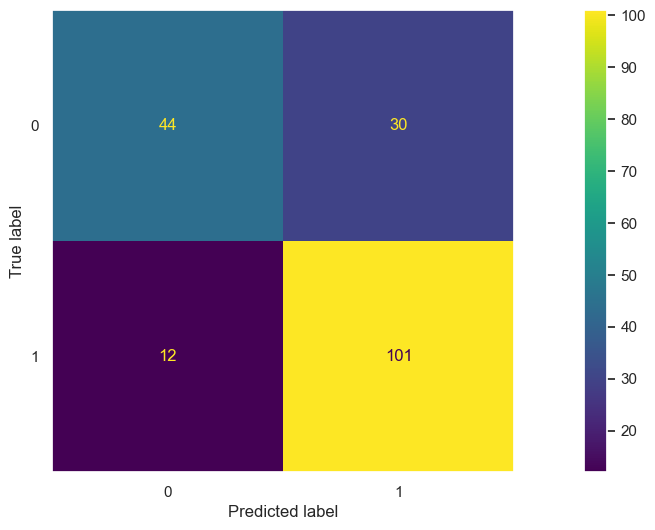

In [39]:
c_matrix = confusion_matrix(y_validation, lda_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels=sorted(list(set(y_test))))
fig, ax = plt.subplots(figsize=(18, 6))
ax.grid(False)
cm_display.plot(ax=ax)
plt.show()

# Wynik

In [42]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69        74
           1       0.85      0.87      0.86       159

    accuracy                           0.81       233
   macro avg       0.78      0.77      0.78       233
weighted avg       0.81      0.81      0.81       233



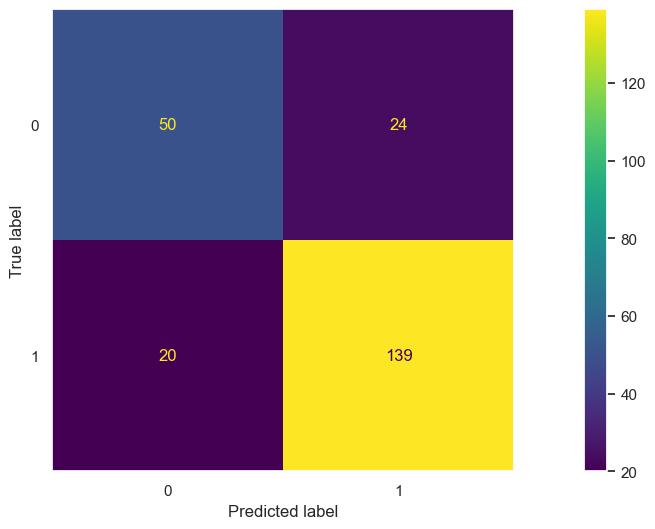

In [43]:
c_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels=sorted(list(set(y_test))))
fig, ax = plt.subplots(figsize=(18, 6))
ax.grid(False)
cm_display.plot(ax=ax)
plt.show()